<a href="https://colab.research.google.com/github/5655530/AIFFEL_CORE_QUEST/blob/main/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**데이터 로드 및 전처리**
---
* reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [ ]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
from keras.datasets import reuters
import numpy as np

(x_train_full, y_train_full), (x_test, y_test) = reuters.load_data(num_words = 10000)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.25,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (8982,) 레이블: (8982,)
학습 데이터: (6736,) 레이블: (6736,)
검증 데이터: (2246,) 레이블: (2246,)
테스트 데이터: (2246,) 레이블: (2246,)


* 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
* 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [ ]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

##**모델 구성 및 컴파일**
---
* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다

In [ ]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 output (Dense)              (None, 46)                5934      
                                                                 
Total params: 1,303,086
Trainable params: 1,302,830
Non-trainable params: 256
__________________________________________

##**모델 학습**
---
* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [ ]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
18/18 [==============================] - 3s 109ms/step - loss: 2.0252 - accuracy: 0.5655 - val_loss: 3.1610 - val_accuracy: 0.7217
Epoch 2/40
18/18 [==============================] - 2s 92ms/step - loss: 0.9599 - accuracy: 0.7901 - val_loss: 2.9670 - val_accuracy: 0.7502
Epoch 3/40
18/18 [==============================] - 2s 96ms/step - loss: 0.6361 - accuracy: 0.8576 - val_loss: 2.7242 - val_accuracy: 0.7520
Epoch 4/40
18/18 [==============================] - 2s 138ms/step - loss: 0.4496 - accuracy: 0.8979 - val_loss: 2.4718 - val_accuracy: 0.7729
Epoch 5/40
18/18 [==============================] - 2s 95ms/step - loss: 0.3457 - accuracy: 0.9205 - val_loss: 2.1803 - val_accuracy: 0.7832
Epoch 6/40
18/18 [==============================] - 2s 96ms/step - loss: 0.2752 - accuracy: 0.9354 - val_loss: 1.9312 - val_accuracy: 0.7796
Epoch 7/40
18/18 [==============================] - 2s 93ms/step - loss: 0.2349 - accuracy: 0.9404 - val_loss: 1.7411 - val_accuracy: 0.7867
Epoch 8/40


<ipython-input-31-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


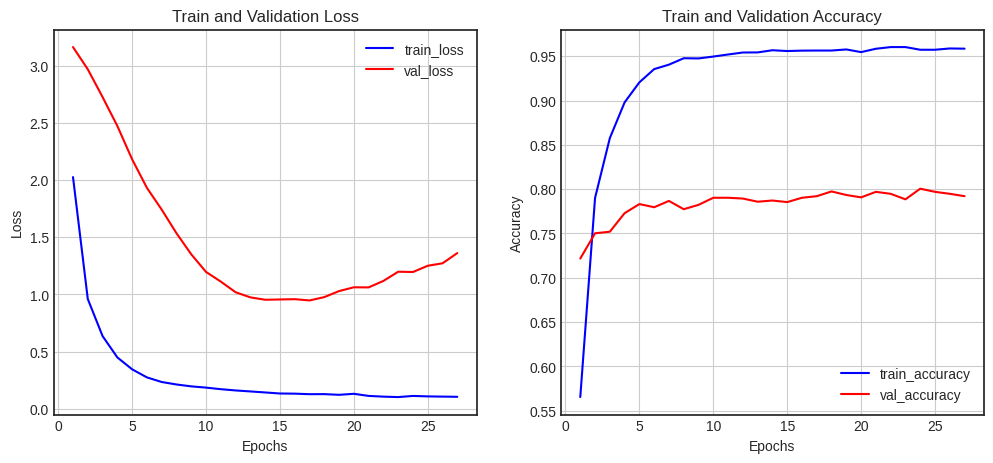

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##**모델 평가 및 예측**
---
테스트 데이터셋을 이용해 모델을 평가합니다.

In [ ]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test,y_test)

71/71 [==============================] - 1s 7ms/step - loss: 0.9474 - accuracy: 0.7921


[0.9474030137062073, 0.7920747995376587]